<a href="https://colab.research.google.com/github/Poohi5/cmpe258_homework/blob/master/Graded_HW1/MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MNIST classifier***


###Import MNIST dataset from sklearn's dataset

#####Separating target column and data column

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
data, target_value = mnist["data"], mnist["target"]

In [2]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
target_value

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

###Normalizing Data

In [0]:
data = data/25

***Step 1***:  Creating a signle node network to recognize Digit '0' 
and then extending the network with one hidden network.

So replaced target variable = 0 for digits other than '0'

In [0]:
import numpy as np

target_new = np.zeros(target_value.shape)
target_new[np.where(target_value == 0.0)[0]] = 1
target_value = target_new

Get Shape of Data

In [6]:
data.shape

(70000, 784)

Train Test Split


1.   1st 60000 for training 
2.   remaining for testing




In [0]:
m = 60000
m_test = data.shape[0] - m

X_train, X_test = data[:m].T, data[m:].T
y_train, y_test = target_value[:m].reshape(1,m), target_value[m:].reshape(1,m_test)

In [0]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

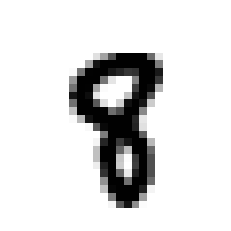

[0.]


In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

Forward Propagation

1.   Single Layer NN




In [0]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

2.  Computing Loss 



In [0]:
def compute_loss(target_value, target_cap):

    m = target_value.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(target_cap),target_value) ) + np.sum( np.multiply(np.log(1-target_cap),(1-target_value)) ) )

    return L



3. ***Back Propagation***   



1.   ***Build Network***
2.   ***Train Network***





In [12]:
X_train.shape[1]

60000

In [13]:
learning_rate = 0.009

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)  #Derivative of weight
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True) #Derivative of bias

    W = W - learning_rate * dW #Updated Weight
    b = b - learning_rate * db #Updated Bias

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6105234872298705
Epoch 100 cost:  0.00012152439986442012
Epoch 200 cost:  0.00010917198317674876
Epoch 300 cost:  9.925982487125219e-05
Epoch 400 cost:  9.111462791719686e-05
Epoch 500 cost:  8.429232906892311e-05
Epoch 600 cost:  7.848767593001654e-05
Epoch 700 cost:  7.348361428322342e-05
Epoch 800 cost:  6.912139179159063e-05
Epoch 900 cost:  6.528209458909599e-05
Epoch 1000 cost:  6.187480921861352e-05
Epoch 1100 cost:  5.882878573230282e-05
Epoch 1200 cost:  5.608810415406105e-05
Epoch 1300 cost:  5.360795596075542e-05
Epoch 1400 cost:  5.135199582949177e-05
Epoch 1500 cost:  4.9290419665131175e-05
Epoch 1600 cost:  4.739854599032613e-05
Epoch 1700 cost:  4.565575285774208e-05
Epoch 1800 cost:  4.40446701792857e-05
Epoch 1900 cost:  4.255055840726326e-05
Final cost: 4.1174242609875355e-05


###Confusion Matrix to check how well the network is built

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[10000]]


In [15]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



***Hidden Layer***

In [16]:
X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(2000):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.8074829326963218
Epoch 100 cost:  0.00035221383078810285
Epoch 200 cost:  0.00019845028572697612
Epoch 300 cost:  0.0001377238620088514
Epoch 400 cost:  0.00010524192516858746
Epoch 500 cost:  8.502903458709523e-05
Epoch 600 cost:  7.124382848253608e-05
Epoch 700 cost:  6.125232660517448e-05
Epoch 800 cost:  5.3691847974437966e-05
Epoch 900 cost:  4.7780830022621686e-05
Epoch 1000 cost:  4.30376300878867e-05
Epoch 1100 cost:  3.915049531390073e-05
Epoch 1200 cost:  3.590916342204584e-05
Epoch 1300 cost:  3.316641180757465e-05
Epoch 1400 cost:  3.08158768709191e-05
Epoch 1500 cost:  2.87788335772927e-05
Epoch 1600 cost:  2.6995914773913728e-05
Epoch 1700 cost:  2.5421655298140084e-05
Epoch 1800 cost:  2.402075844034936e-05
Epoch 1900 cost:  2.276547811438387e-05
Final cost: 2.1644519930176784e-05


In [17]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[10000]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



####Building and Training the network again for all the digits

In [0]:
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

X = X / 255

In [19]:
y.shape[0]

70000

In [0]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [0]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

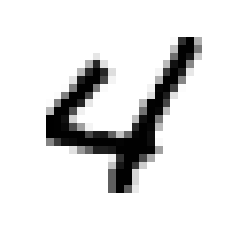

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [22]:
i = 0
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [0]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [24]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.243960401572568
Epoch 100 cost:  0.7134535660524418
Epoch 200 cost:  0.5462884158664557
Epoch 300 cost:  0.47407667199219733
Epoch 400 cost:  0.43044019480309753
Epoch 500 cost:  0.39974027536329576
Epoch 600 cost:  0.37618936761727756
Epoch 700 cost:  0.3571353999524551
Epoch 800 cost:  0.3411506935592258
Epoch 900 cost:  0.3273860548790497
Epoch 1000 cost:  0.31529820788285273
Epoch 1100 cost:  0.3045201747693517
Epoch 1200 cost:  0.2947990122905445
Epoch 1300 cost:  0.28596041334605765
Epoch 1400 cost:  0.2778797990892058
Epoch 1500 cost:  0.2704589456045861
Epoch 1600 cost:  0.2636138261391982
Epoch 1700 cost:  0.25727120702766354
Epoch 1800 cost:  0.2513681959844856
Epoch 1900 cost:  0.24585173887243106
Final cost: 0.2407277687787012


In [25]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 946    0   14    3    3   10   12    2    9    4]
 [   0 1112    3    2    1    1    2    8    3    4]
 [   3    4  937   24   10    7    8   18    8    3]
 [   4    2   17  924    1   39    4   13   26    9]
 [   0    1   10    0  905    9   11    9   10   40]
 [  12    5    2   26    3  786   15    3   24   14]
 [   8    1   19    2    9   10  902    1    9    1]
 [   2    1   13   14    3    5    1  946    9   25]
 [   5    9   16   11    5   18    3    5  868    9]
 [   0    0    1    4   42    7    0   23    8  900]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1003
           1       0.98      0.98      0.98      1136
           2       0.91      0.92      0.91      1022
           3       0.91      0.89      0.90      1039
           4       0.92      0.91      0.92       995
           5       0.88      0.88      0.88       890
           6       0.94      0.94      0.94       962
           7       0.92      0.93   

***Results above shows*** 92% Accuracy, lets try to improve Accuracy 
using MiniBatch as below

###Using Mini-Batch to improve the Accuracy

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# import
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

# scale
X = X / 255

# one-hot encode labels
digits = 10
examples = y.shape[0]
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

# split, reshape, shuffle
m = 60000
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [0]:
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

def feed_forward(X, params):

    cache = {}

    cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]
    cache["A1"] = sigmoid(cache["Z1"])
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache

def back_propagate(X, Y, params, cache):

    dZ2 = cache["A2"] - Y
    dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
    db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [28]:
np.random.seed(138)

# hyperparameters
n_x = X_train.shape[0]
n_h = 64
learning_rate = 4
beta = .9
batch_size = 128
batches = -(-m // batch_size)

# initialization
params = { "W1": np.random.randn(n_h, n_x) * np.sqrt(1. / n_x),
           "b1": np.zeros((n_h, 1)) * np.sqrt(1. / n_x),
           "W2": np.random.randn(digits, n_h) * np.sqrt(1. / n_h),
           "b2": np.zeros((digits, 1)) * np.sqrt(1. / n_h) }

V_dW1 = np.zeros(params["W1"].shape)
V_db1 = np.zeros(params["b1"].shape)
V_dW2 = np.zeros(params["W2"].shape)
V_db2 = np.zeros(params["b2"].shape)

# train
for i in range(9):

    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        cache = feed_forward(X, params)
        grads = back_propagate(X, Y, params, cache)

        V_dW1 = (beta * V_dW1 + (1. - beta) * grads["dW1"])
        V_db1 = (beta * V_db1 + (1. - beta) * grads["db1"])
        V_dW2 = (beta * V_dW2 + (1. - beta) * grads["dW2"])
        V_db2 = (beta * V_db2 + (1. - beta) * grads["db2"])

        params["W1"] = params["W1"] - learning_rate * V_dW1
        params["b1"] = params["b1"] - learning_rate * V_db1
        params["W2"] = params["W2"] - learning_rate * V_dW2
        params["b2"] = params["b2"] - learning_rate * V_db2

    cache = feed_forward(X_train, params)
    train_cost = compute_loss(Y_train, cache["A2"])
    cache = feed_forward(X_test, params)
    test_cost = compute_loss(Y_test, cache["A2"])
    print("Epoch {}: training cost = {}, test cost = {}".format(i+1 ,train_cost, test_cost))


Epoch 1: training cost = 0.1439031436236452, test cost = 0.1511736548242371
Epoch 2: training cost = 0.10489176568318043, test cost = 0.12610724015866995
Epoch 3: training cost = 0.07117930521816553, test cost = 0.09626734182364376
Epoch 4: training cost = 0.06600111178883296, test cost = 0.09936163676388744
Epoch 5: training cost = 0.05756855595152053, test cost = 0.09925853745145528
Epoch 6: training cost = 0.04501687135832394, test cost = 0.09269754521483653
Epoch 7: training cost = 0.03875753183632057, test cost = 0.08777017769662733
Epoch 8: training cost = 0.03416242751801321, test cost = 0.08937063034186807
Epoch 9: training cost = 0.02949779822183466, test cost = 0.08438243311975083


In [29]:
cache = feed_forward(X_test, params)
predictions = np.argmax(cache["A2"], axis=0)
labels = np.argmax(Y_test, axis=0)

print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       988
           1       0.99      0.99      0.99      1145
           2       0.98      0.97      0.97      1040
           3       0.97      0.98      0.97       993
           4       0.97      0.98      0.98       970
           5       0.98      0.96      0.97       909
           6       0.98      0.98      0.98       959
           7       0.98      0.96      0.97      1047
           8       0.96      0.98      0.97       946
           9       0.97      0.97      0.97      1003

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



***Results Above*** shows 97% Accuracy using Mini Batch and Sigmoid Activation Function.


***1.   Now Lets try using ReLU Activation Function***




In [0]:
def relu(x):
    y=x
    for i in range(x.shape[0]):
        y[i]=np.maximum(0,x[i])
    return y

def relu_derivative(x):
    y=x
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if(x[i][j]>0.0):
                y[i][j]= 1.0
            else:
                y[i][j]= 0.0
    return y

def compute_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

def feed_forward(X, params):

    cache = {}

    cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]
    cache["A1"] = relu(cache["Z1"])
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache

def back_propagate(X, Y, params, cache):

    dZ2 = cache["A2"] - Y
    dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * relu_derivative(cache["Z1"])
    #relu(cache["Z1"]) * (1 - relu(cache["Z1"]))
    dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
    db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [31]:
np.random.seed(138)

# Hyperparameters
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1
beta = .9
batch_size = 256
batches = -(-m // batch_size)

# Weight and Bias Initialization
params = { "W1": np.random.randn(n_h, n_x) * np.sqrt(1. / n_x),
           "b1": np.zeros((n_h, 1)) * np.sqrt(1. / n_x),
           "W2": np.random.randn(digits, n_h) * np.sqrt(1. / n_h),
           "b2": np.zeros((digits, 1)) * np.sqrt(1. / n_h) }

V_dW1 = np.zeros(params["W1"].shape)
V_db1 = np.zeros(params["b1"].shape)
V_dW2 = np.zeros(params["W2"].shape)
V_db2 = np.zeros(params["b2"].shape)

# Network Training
for i in range(9):

    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        cache = feed_forward(X, params)
        grads = back_propagate(X, Y, params, cache)

        V_dW1 = (beta * V_dW1 + (1. - beta) * grads["dW1"])
        V_db1 = (beta * V_db1 + (1. - beta) * grads["db1"])
        V_dW2 = (beta * V_dW2 + (1. - beta) * grads["dW2"])
        V_db2 = (beta * V_db2 + (1. - beta) * grads["db2"])

        params["W1"] = params["W1"] - learning_rate * V_dW1
        params["b1"] = params["b1"] - learning_rate * V_db1
        params["W2"] = params["W2"] - learning_rate * V_dW2
        params["b2"] = params["b2"] - learning_rate * V_db2

    cache = feed_forward(X_train, params)
    train_cost = compute_loss(Y_train, cache["A2"])
    cache = feed_forward(X_test, params)
    test_cost = compute_loss(Y_test, cache["A2"])
    print("Epoch {}: training cost = {}, test cost = {}".format(i+1 ,train_cost, test_cost))


Epoch 1: training cost = 0.18401715033927113, test cost = 0.18216641852440757
Epoch 2: training cost = 0.1348218657673786, test cost = 0.14641685916673933
Epoch 3: training cost = 0.10140553984585593, test cost = 0.11749298342409743
Epoch 4: training cost = 0.0863932941884768, test cost = 0.10857196084942551
Epoch 5: training cost = 0.06625172663672982, test cost = 0.0970926139014988
Epoch 6: training cost = 0.05676340230216141, test cost = 0.08962294890600608
Epoch 7: training cost = 0.046428157668609984, test cost = 0.08512529990175673
Epoch 8: training cost = 0.04124533450029761, test cost = 0.08241050517961715
Epoch 9: training cost = 0.037820958324816654, test cost = 0.08234959365406996


In [32]:
cache = feed_forward(X_test, params)
predictions = np.argmax(cache["A2"], axis=0)
labels = np.argmax(Y_test, axis=0)

print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       972
           1       0.99      0.99      0.99      1136
           2       0.98      0.97      0.98      1044
           3       0.99      0.96      0.97      1037
           4       0.97      0.98      0.98       968
           5       0.98      0.98      0.98       891
           6       0.98      0.98      0.98       959
           7       0.97      0.97      0.97      1031
           8       0.95      0.98      0.97       940
           9       0.97      0.96      0.96      1022

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



***Results Above Shows*** 98% Accuracy using ReLU Activation Function


***Confusion Matrix***

In [33]:
print(confusion_matrix(predictions, labels))

[[ 957    0    2    0    0    2    5    1    2    3]
 [   0 1125    1    0    1    0    3    3    0    3]
 [   3    3 1016    2    3    0    0   11    6    0]
 [   1    2    2  996    0    9    1    4   16    6]
 [   1    0    1    0  952    0    3    0    3    8]
 [   4    1    0    1    1  871    3    0    7    3]
 [   3    1    3    0    4    2  941    0    4    1]
 [   3    1    6    4    3    3    1  996    7    7]
 [   3    2    1    1    2    3    1    1  925    1]
 [   5    0    0    6   16    2    0   12    4  977]]
